In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [59]:
df = pd.read_csv('car_sales_data.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [61]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [62]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [63]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [64]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


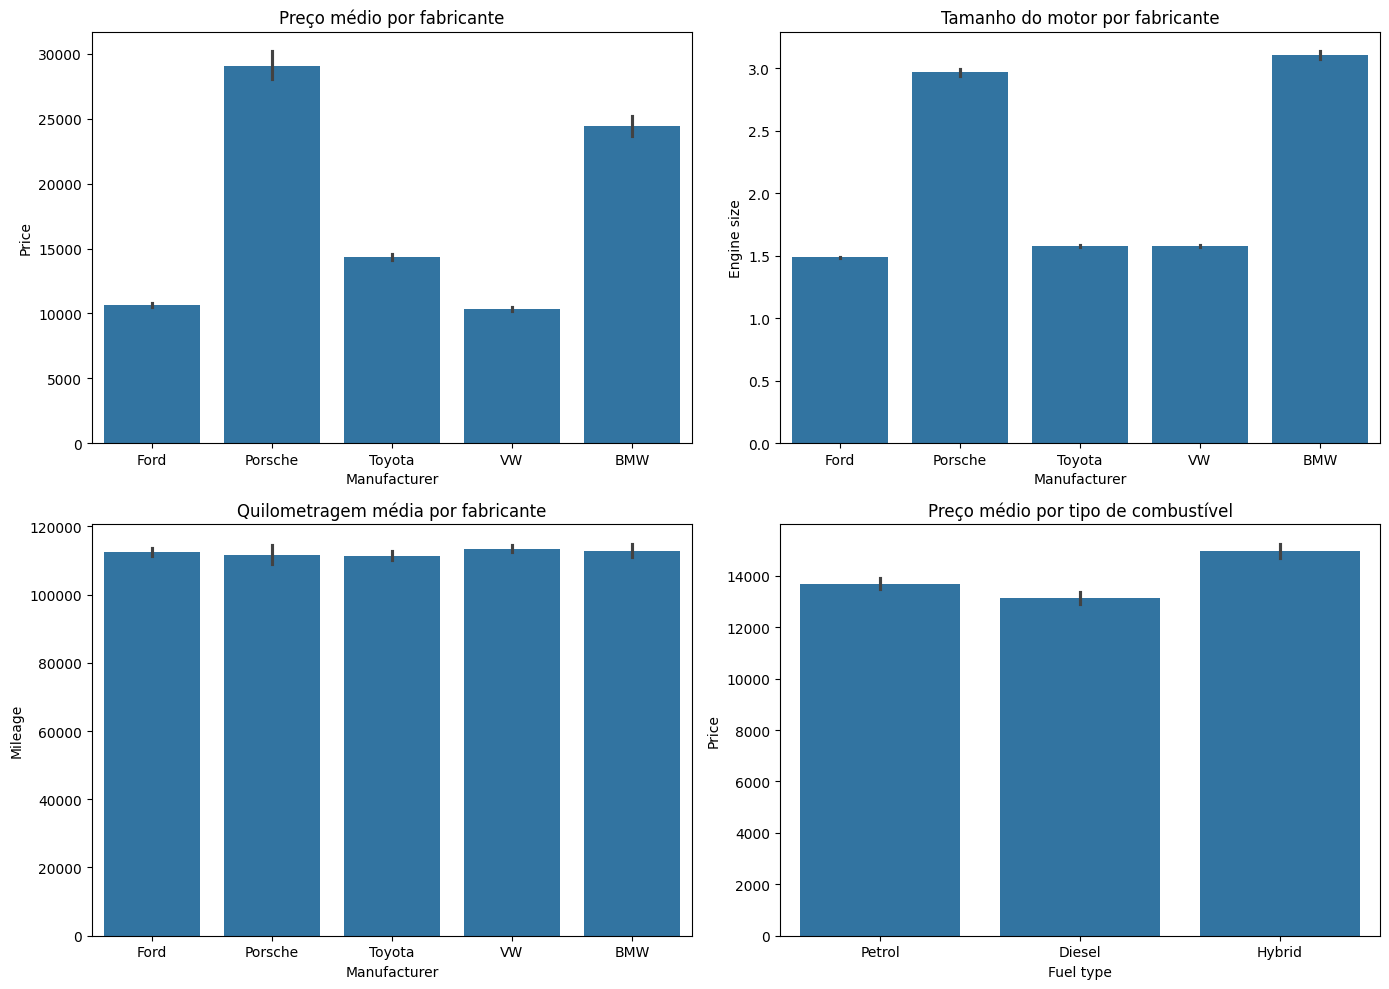

In [65]:
# Grade dos subpltots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(data=df, x='Manufacturer', y='Price', ax=axes[0, 0])
axes[0, 0].set_title("Preço médio por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Engine size', ax=axes[0, 1])
axes[0, 1].set_title("Tamanho do motor por fabricante")

sns.barplot(data=df, x='Manufacturer', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Quilometragem média por fabricante")

sns.barplot(data=df, x='Fuel type', y='Price', ax=axes[1, 1])
axes[1, 1].set_title("Preço médio por tipo de combustível")

plt.tight_layout()
plt.show()

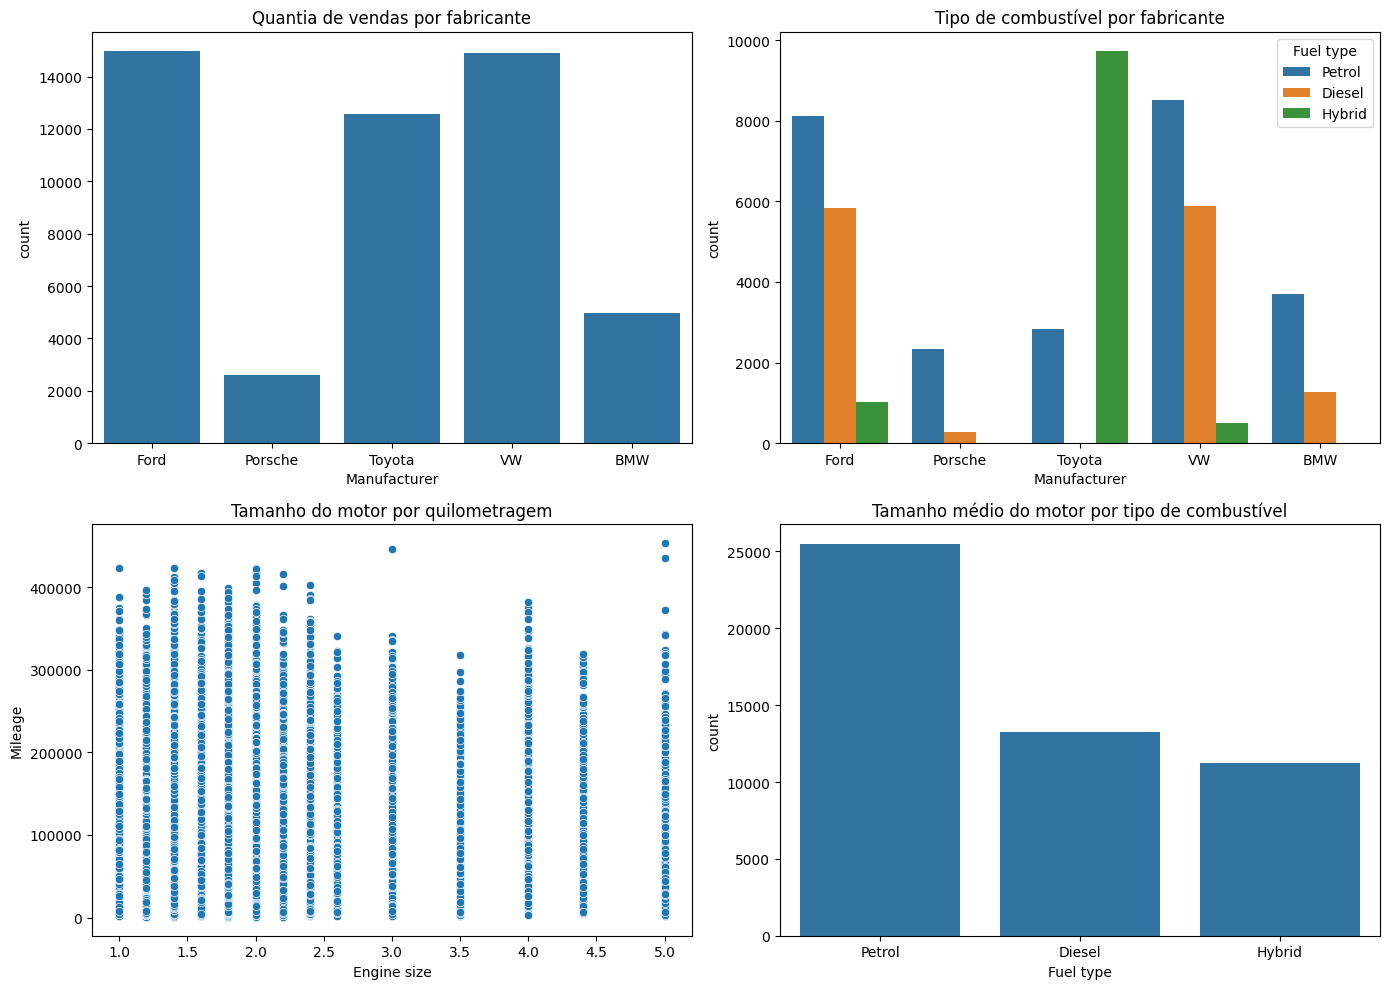

In [66]:
# Grade dos subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='Manufacturer', ax=axes[0, 0])
axes[0, 0].set_title("Quantia de vendas por fabricante")

sns.countplot(data=df, x='Manufacturer', hue='Fuel type', ax=axes[0, 1])
axes[0, 1].set_title("Tipo de combustível por fabricante")

sns.scatterplot(data=df, x='Engine size', y='Mileage', ax=axes[1, 0])
axes[1, 0].set_title("Tamanho do motor por quilometragem")

sns.countplot(data=df, x='Fuel type', ax=axes[1, 1])
axes[1, 1].set_title("Tamanho médio do motor por tipo de combustível")

plt.tight_layout()
plt.show()

In [67]:
combustivel_freq = df['Fuel type'].value_counts()
combustivel_perc = df['Fuel type'].value_counts(normalize=True) * 100
print("\n=== Tipo de combustível ===")
print(pd.DataFrame({'Frequência': combustivel_freq, 'Percentual (%)': combustivel_perc.round(2)}))


=== Tipo de combustível ===
           Frequência  Percentual (%)
Fuel type                            
Petrol          25488           50.98
Diesel          13268           26.54
Hybrid          11244           22.49


In [68]:
fabricante_freq = df['Manufacturer'].value_counts()
fabricante_perc = df['Manufacturer'].value_counts(normalize=True) * 100
print("=== Fabricante ===")
print(pd.DataFrame({'Frequência': fabricante_freq, 'Percentual (%)': fabricante_perc.round(2)}).head())

=== Fabricante ===
              Frequência  Percentual (%)
Manufacturer                            
Ford               14959           29.92
VW                 14913           29.83
Toyota             12554           25.11
BMW                 4965            9.93
Porsche             2609            5.22


In [69]:
df['Decada'] = (df['Year of manufacture'] // 10) * 10
decada_freq = df['Decada'].value_counts().sort_index()
decada_perc = df['Decada'].value_counts(normalize=True)* 100
print("\n=== Distribuição por década de fabricação ===")
print(pd.DataFrame({'Frequência': decada_freq, 'Percentual (%)': decada_perc.round(2)}))



=== Distribuição por década de fabricação ===
        Frequência  Percentual (%)
Decada                            
1980          3168            6.34
1990         14439           28.88
2000         15330           30.66
2010         15229           30.46
2020          1834            3.67


In [70]:
g1 = df.loc[df['Fuel type']=='Petrol', 'Price']
g2 = df.loc[df['Fuel type']=='Diesel', 'Price']
stats.ttest_ind(g1, g2, equal_var=False)


TtestResult(statistic=np.float64(3.3682556061336437), pvalue=np.float64(0.0007572637646124077), df=np.float64(35249.69173182213))